loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
Total Images: 1867
Total Annotations: 3424


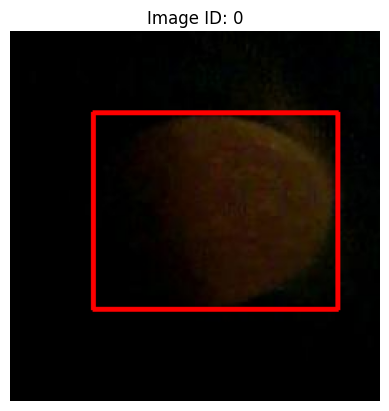

In [3]:
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import cv2
import os

# Path to the COCO annotation file
annotation_file = "C:/Users/sirajje/Desktop/new egg dataset/train/_annotations.coco.json"
image_folder = "C:/Users/sirajje/Desktop/new egg dataset/train"

# Load COCO annotations
coco = COCO(annotation_file)

# Get image and annotation IDs
image_ids = coco.getImgIds()
annotation_ids = coco.getAnnIds()

# Print basic info
print(f"Total Images: {len(image_ids)}")
print(f"Total Annotations: {len(annotation_ids)}")

# Visualize a sample image
sample_image_id = image_ids[0]
sample_image_info = coco.loadImgs(sample_image_id)[0]
sample_image_path = os.path.join(image_folder, sample_image_info['file_name'])
sample_annotations = coco.loadAnns(coco.getAnnIds(imgIds=sample_image_id))

# Load and display the image
image = cv2.imread(sample_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Draw bounding boxes
for ann in sample_annotations:
    bbox = ann['bbox']
    x, y, w, h = map(int, bbox)
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

plt.imshow(image)
plt.title(f"Image ID: {sample_image_id}")
plt.axis("off")
plt.show()

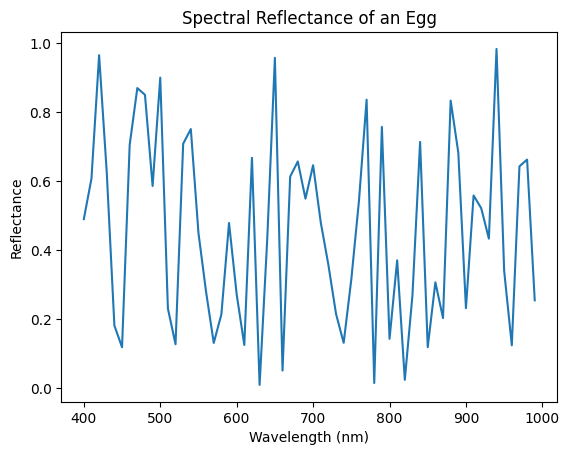

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Example: Simulate spectral reflectance for an egg
wavelengths = np.arange(400, 1000, 10)  # Wavelengths in nm
reflectance = np.random.rand(len(wavelengths))  # Simulated reflectance values

# Plot the spectral reflectance
plt.plot(wavelengths, reflectance)
plt.title("Spectral Reflectance of an Egg")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectance")
plt.show()


Dataset: train
Number of images: 1867
Number of annotations: 3424


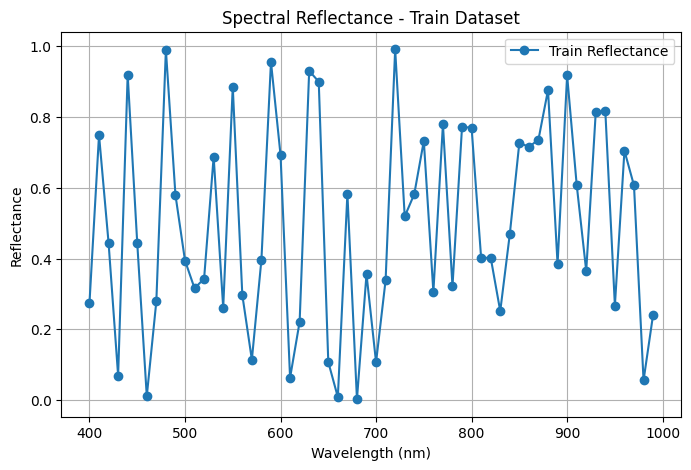


Dataset: valid
Number of images: 74
Number of annotations: 187


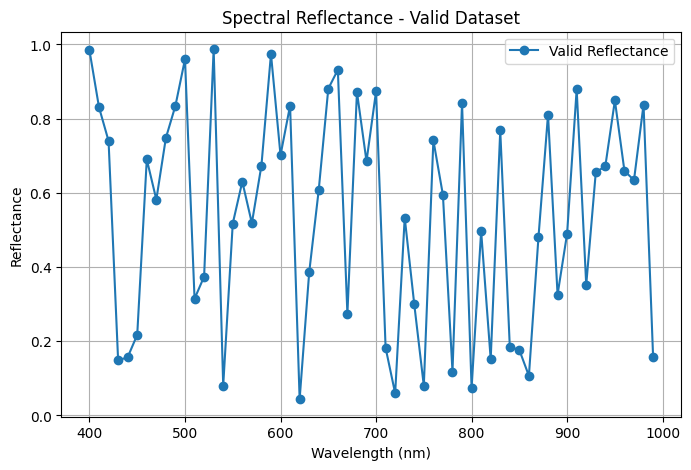


Dataset: test
Number of images: 77
Number of annotations: 136


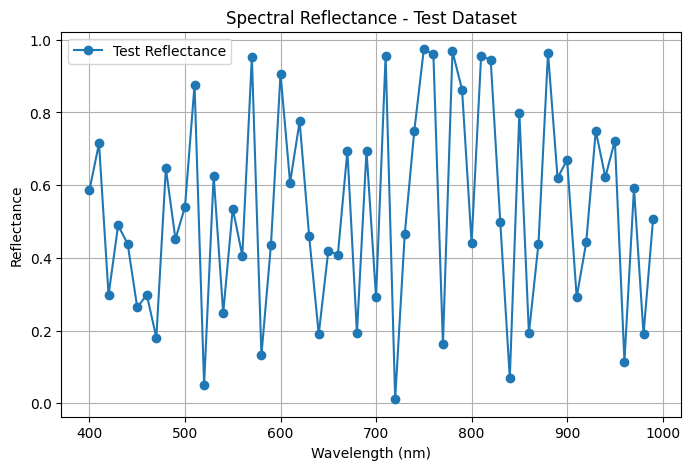

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json

# Define base dataset path
base_path = "C:/Users/sirajje/Desktop/new egg dataset"

# Dataset partitions
datasets = ["train", "valid", "test"]

# Function to load COCO annotations
def load_coco_annotations(file_path):
    if os.path.exists(file_path):
        with open(file_path, "r", encoding="utf-8") as f:
            return json.load(f)
    else:
        print(f"File not found: {file_path}")
        return None

# Iterate over datasets (train, valid, test)
for dataset in datasets:
    ann_file = os.path.join(base_path, dataset, "_annotations.coco.json")
    
    # Load annotation file
    annotations = load_coco_annotations(ann_file)
    
    if annotations:
        print(f"\nDataset: {dataset}")
        print(f"Number of images: {len(annotations.get('images', []))}")
        print(f"Number of annotations: {len(annotations.get('annotations', []))}")
    
    # Simulate spectral reflectance
    wavelengths = np.arange(400, 1000, 10)  # Wavelengths in nm
    reflectance = np.random.rand(len(wavelengths))  # Simulated reflectance values
    
    # Plot spectral reflectance for each dataset
    plt.figure(figsize=(8, 5))
    plt.plot(wavelengths, reflectance, label=f"{dataset.capitalize()} Reflectance", linestyle='-', marker='o')
    plt.title(f"Spectral Reflectance - {dataset.capitalize()} Dataset")
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Reflectance")
    plt.legend()
    plt.grid(True)
    plt.show()
